# EDA

In [2]:
#Imports
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("white")
sns.set_context("poster")
import copy
import pfr
import time

First, we read in our data for all the pass and run plays for the 2003-2014 seasons and reset the DataFrame's index.

In [39]:
# reupload all data to have as one dataset again
completedf1 = pd.concat([pd.read_csv('0204plays.csv'),pd.read_csv('0507plays.csv'),pd.read_csv('0810plays.csv'),pd.read_csv('1114plays.csv')])

#(remove 2002, because it has served it's purpose of creating 2003 priors)
df = completedf1[completedf1['year']>2002].reset_index(drop=True)

In [40]:
df.shape

(393294, 139)

In [41]:
df.head(2)

,away,bsID,challengeUpheld,challenger,detail,distToGoal,down,exp_pts_after,exp_pts_before,fairCatcher,fgBlockRecoverer,fgBlockRetYds,fgBlocker,fgDist,fgGood,fgKicker,fieldside,fumbForcer,fumbRecFieldside,fumbRecYdLine,fumbRecoverer,fumbRetYds,fumbler,home,home_wp,intFieldside,intRetYds,intYdLine,interceptor,isBlocked,isChallenged,isComplete,isFairCatch,isFieldGoal,isFumble,isInt,isKickoff,isKneel,isLateral,isMuffedCatch,isPass,isPenalty,isPresnapPenalty,isPunt,isRun,isSpike,isTD,isTimeout,isTouchback,isTwoPoint,...,target,timeoutNum,timeoutTeam,tm,twoPointSuccess,xpGood,xpKicker,ydLine,yds,yds_to_go,year,is1stHalf,is2ndHalf,half,isHome,secsElapsedInHalf,isLast3minHalf,hm_TO_left,aw_TO_left,tm_score,opp_score,tm_winprob,tm_TO_left,opp_TO_left,margin,addscore,isFGRange,isRedZone,dist_to_1st,yeartm,yeartmdowndist_to_1st,tm_prev_yr_pass,month,day,gameNum,tm_in_season_pass,tm_in_game_pass,RESP,inFGRange,inRedZone,inLast3minHalf,inDown1,inDown2,inDown3,inQuarter1,inQuarter2,inQuarter3,inQuarter4,prevWasPass,StartofDrive
0,atl,200309070dal,False,NaN,DunnWa00 up the middle for 4 yards (tackle by ...,75,1,0.6,0.61,NaN,NaN,NaN,NaN,NaN,False,NaN,atl,NaN,NaN,NaN,NaN,NaN,NaN,dal,54.1,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,...,NaN,NaN,NaN,atl,False,False,NaN,25,4,10,2003,True,False,1,False,5,False,3,3,0,0,45.9,3,3,0,0,False,False,long,2003atl,2003atl1.0long,0.407494,9,7,1,0.507029,0.507029,0,0,0,0,1,0,0,1,0,0,0,0,1
1,atl,200309070dal,False,NaN,DunnWa00 left tackle for 3 yards (tackle by El...,71,2,0.3,0.60,NaN,NaN,NaN,NaN,NaN,False,NaN,atl,NaN,NaN,NaN,NaN,NaN,NaN,dal,55.0,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,...,NaN,NaN,NaN,atl,False,False,NaN,29,3,6,2003,True,False,1,False,42,False,3,3,0,0,45.0,3,3,0,0,False,False,medium,2003atl,2003atl2.0medium,0.398148,9,7,1,0.507029,0.000000,0,0,0,0,0,1,0,1,0,0,0,0,0


A quick way to summarize or describe this large DataFrame is by viewing the probability of each type of play (run vs. pass) and location on a simple football field. We will use similar diagrams to the one below throughout this notebook. 


![Image of NFL Distribution](images/2003-2014_Football_Play_Distribution_1.png)


These type of charts display the relative passing vs. run percentages and even breakdown these percentages by location. A *"blue-er"* pass location signifies a more common play, and the purple, upside down histogram displays the running tendencies towards the left end, left tackle, left guard, middle, right guard, right tackle and right end respectively. It's obvious that throughout these seasons, the most common pass play was short to the right with 15.56% chance whereas the most common run play was down the middle with 15.1% of the time. 


Given this DataFrame we will now calculate each teams progression on pass percentage and display the charts alongside each other. We then further explore some interesting anomalies in a few of the teams passing percentages.

In [42]:
# Determine pass percent and unique teams
passpct = df.groupby(['tm', 'year'])['isPass'].mean()
teams = df.tm.unique()

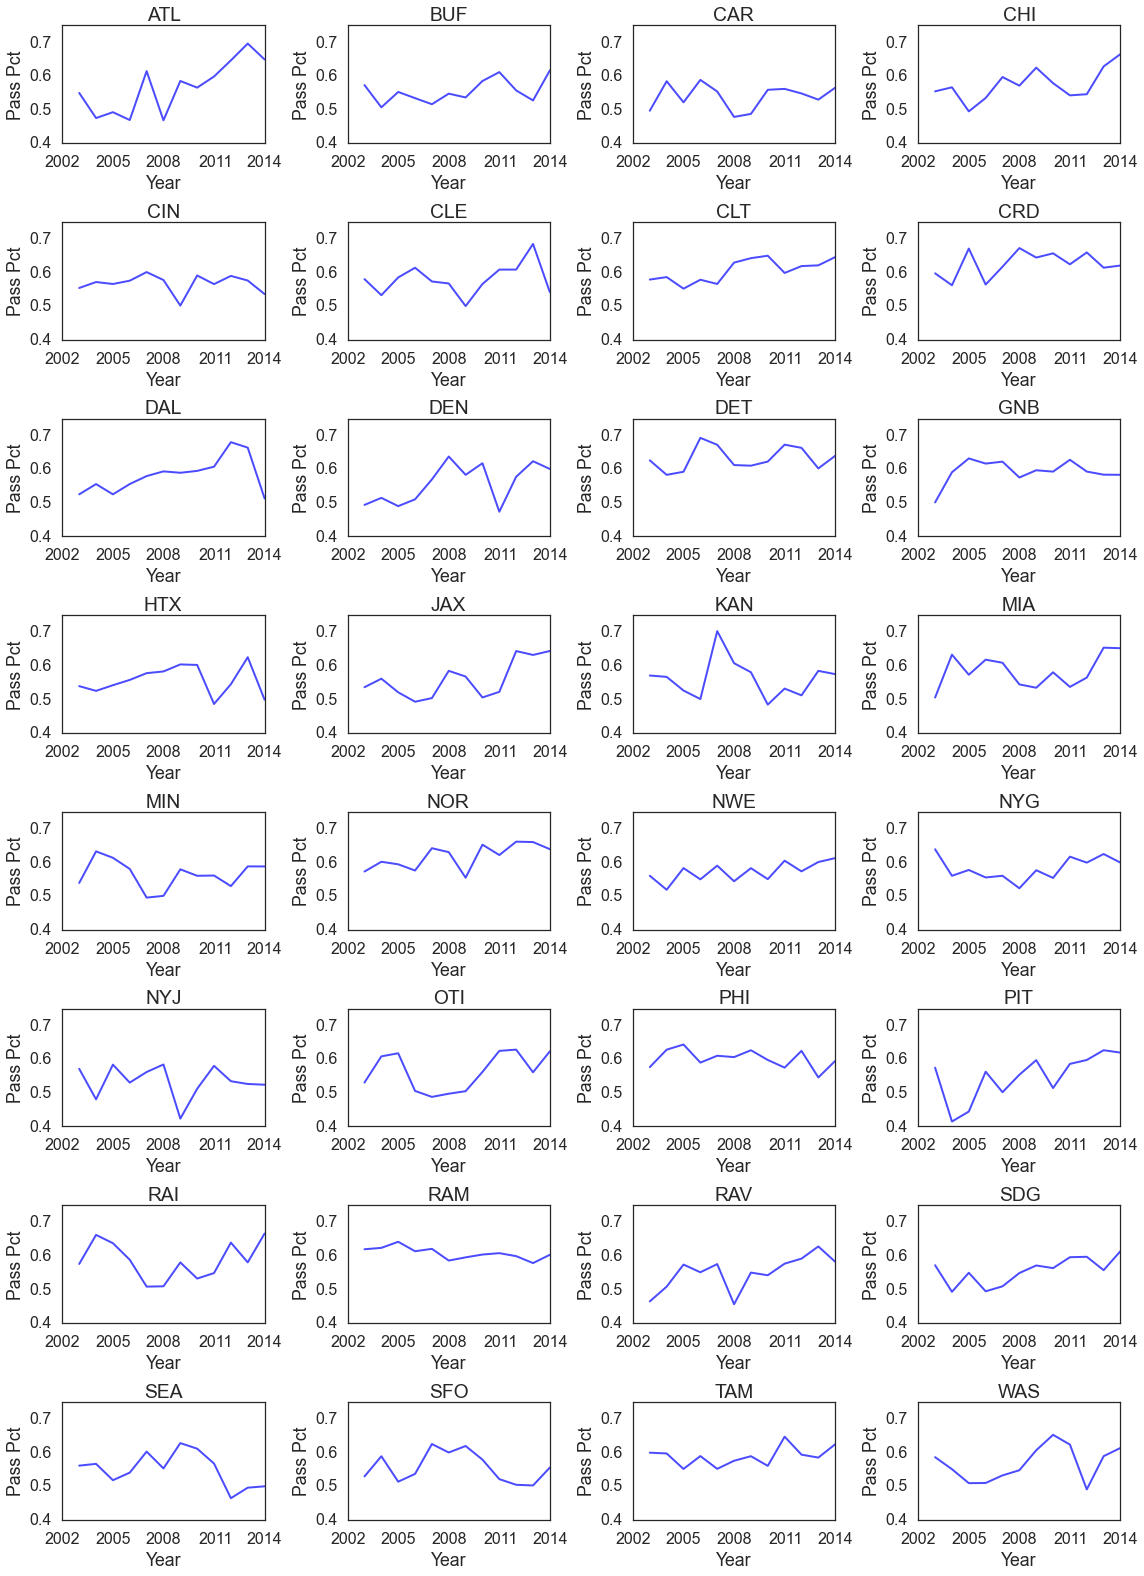

In [43]:
# Plot pass percent for each team
fig, axes = plt.subplots(8,4, figsize=(16,22),tight_layout=True)

for ax, tm in zip(axes.ravel(), teams):
    ax.plot(passpct[tm].keys(), passpct[tm].values, color='b', alpha=.7, lw=2)
    ax.set_ylim(.4,.75)
    ax.set_yticks(np.arange(.4,.8,.1))
    ax.set_xticks(np.arange(2002,2017,3))
    ax.set_title(tm.upper())
    ax.set_xlabel("Year")
    ax.set_ylabel("Pass Pct")
    ax.grid(False)
fig.savefig('images/passpct.png')

These charts display each team's variation on pass percentage from the 2002 through the 2014 NFL season. It's interesting to note that some teams like the Rams, Cardinals, Tampa and the Giants have maintained a relatively constant pass percentage while others such as the Titans, Kansas and Atlanta display a more volatile number of passes throughout their seasons. Further research shows that the decline in the Denver Broncos pass percentage for the 2011 season is likely due to the resurrection of Tim Tebow as their starting quarterback, who did not posess the most accurate arm but great scrambling abilities around the pocket. In addition, the 2009 season of the New York Jets show a remarkable decline in pass percentage as it was the rookie season for their new quarterback, Mark Sanchez. Lastly, the 2013 Atlanta Falcons displayed incredibly high passing percent numbers in 2013 as Matt Ryan threw the ball a career high, 651 times. 


It's clear that both the 2009 New York Jets and the 2013 Atlanta Falcons display interesting and nearly opposite results in pass percentage, so we further broke down each team's play (run vs. pass) distribution:

**2009 New York Jets:** characterized by a heavy run game and impenetrable defense. It's clear that the Jets significantly ran the ball towards the right during the 2009 season and rarely passed deep.


![Image of Jets](images/2009_NYJ_Football_Play_Distribution_1.png)





**2013 Atlanta Falcons:** one of the more pass-happy teams in recent memory. This Falcons offense occasionally ran the ball down down the middle and consistently passed the ball short distances. It's interesting that they didn't pass more long balls. Perhaps the fact that their deep threat reciever, Julio Jones, was injured that year.


![Image of Falcons](images/2013_ATL_Football_Play_Distribution_1.png)


Now similar to our first football field visualization of the 2003-2014 play distribution, we display the league-wide average pass percentage progression:

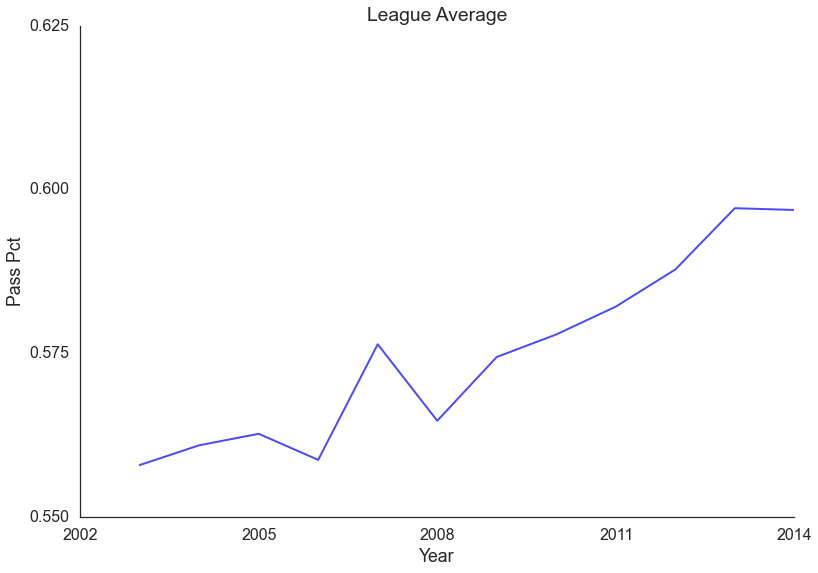

In [44]:
#get league average
lg_passpct = df.groupby('year')['isPass'].mean()
#plot the league average
plt.plot(lg_passpct.keys(),lg_passpct.values, color='b', alpha=.7, linewidth=2)
plt.ylim(.55,.625)
plt.yticks(np.arange(.55,.65,.025))
plt.xticks(np.arange(2002,2017,3))
plt.title("League Average")
plt.xlabel("Year")
plt.ylabel("Pass Pct")
plt.grid(False)
sns.despine()

There is a clear  positive, increasing trend to the league-average pass percentage progression. Obviously, this trend isn't exact as there were fewer passes in 2008 as than in 2007 and the earlier diagrams showed volatile passing teams such as the Titans, however, quarterbacks across most teams seem to exhibit higher pass frequencies. 


### **Transition to feature selection:**

We now select our features and proceed to display exploratory charts for both our continuous and indicator variables. In later sections, we will feed these features into our classifiers to predict which plays the offense will run or pass the football. 

In [45]:
#Define our features
lcols = ["distToGoal","inDown3","inDown2","inDown1","inQuarter4","inQuarter3","inQuarter2","inQuarter1","secsElapsedInHalf","margin","yds_to_go","addscore","tm_TO_left","opp_TO_left","inFGRange", "inRedZone", "tm_winprob","inLast3minHalf", "tm_prev_yr_pass","tm_in_season_pass","tm_in_game_pass","StartofDrive","prevWasPass"]

In [46]:
#Define our continuous features
lcols_c = ["distToGoal", "secsElapsedInHalf", "margin", "yds_to_go", "addscore", "tm_winprob", "tm_prev_yr_pass", "tm_in_season_pass", "tm_in_game_pass"]

In [47]:
#Define our indicator features
lcols_i = list(set(lcols) - set(lcols_c))

In [48]:
#Labels
lbl = ["Run", "Pass"]

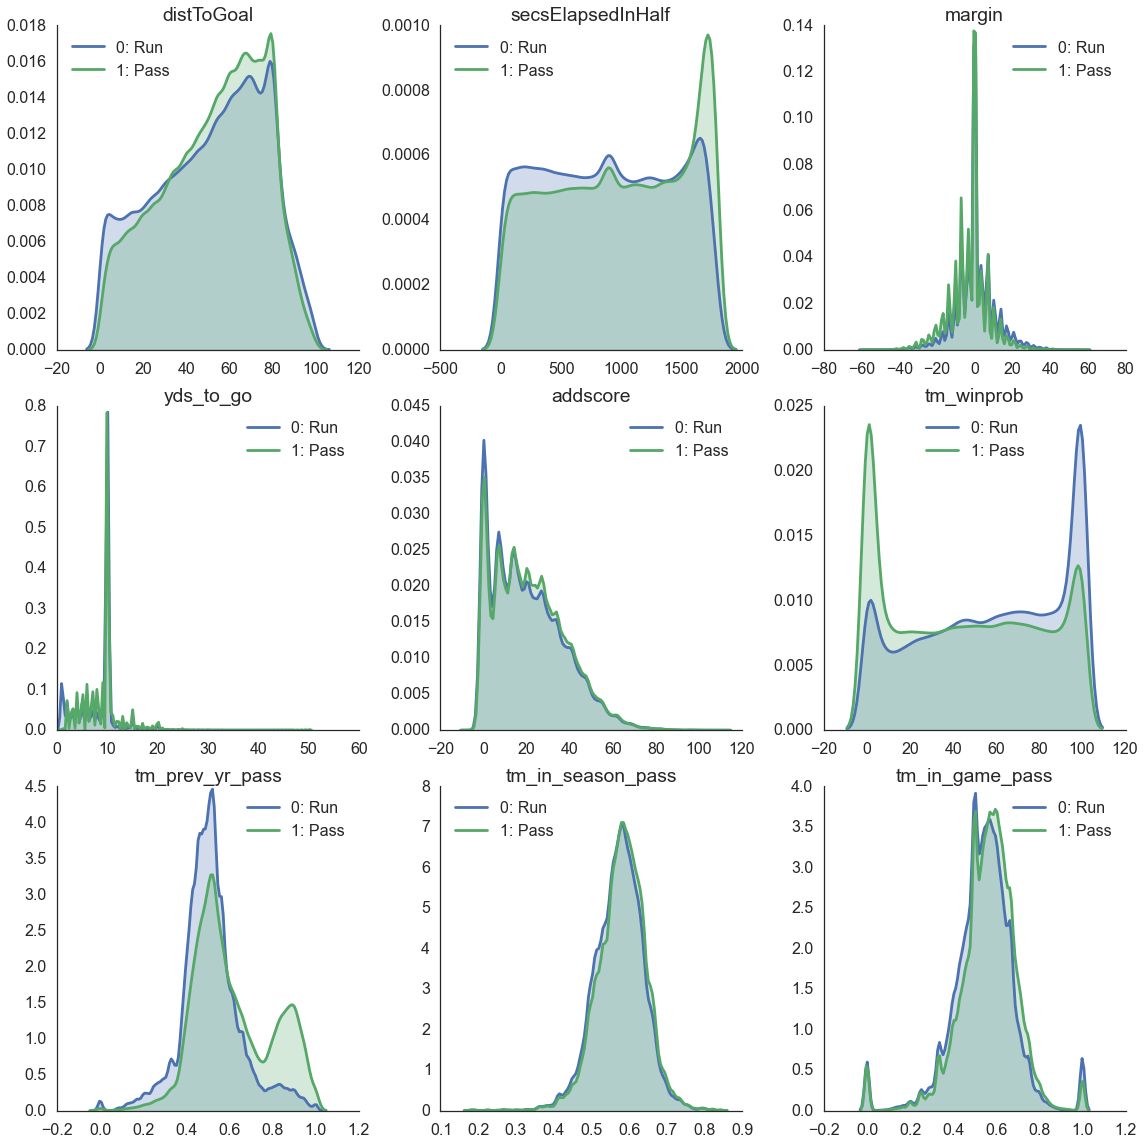

In [49]:
#Display plots of EDA on continuous variables
dfgb=df.groupby('RESP')
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 16), tight_layout=True)
for ax, p in zip(axes.ravel(), lcols_c):
    for k, v in dfgb[p]:
        sns.kdeplot(v, ax=ax, label=str(k)+": "+lbl[int(k)], shade=True)
        sns.despine()
        ax.set_title(p)
        ax.legend(loc='best')

**Interpretation of continuous features EDA:**


These charts display how well each continuous feature distinguishes between pass and run plays. Some interesting variables that show little overlap among these types of plays are `yds_to_go`, `tm_winprob` and perhaps `tm_prev_yr_pass`. Each one of these interesting features displays an isolated spike in its graph for both positive and negative values (pass or run values respectively). For instance, if there are very few `yds_to_go` then it's likely that the offense will run; whereas, if there is a high or low `tm_winprob` of the offense winning then there is a low and high chance respectively of the team passing. This makes sense since if the team is likely going to win the game, then the offense will elect to run out the clock by running the ball. 

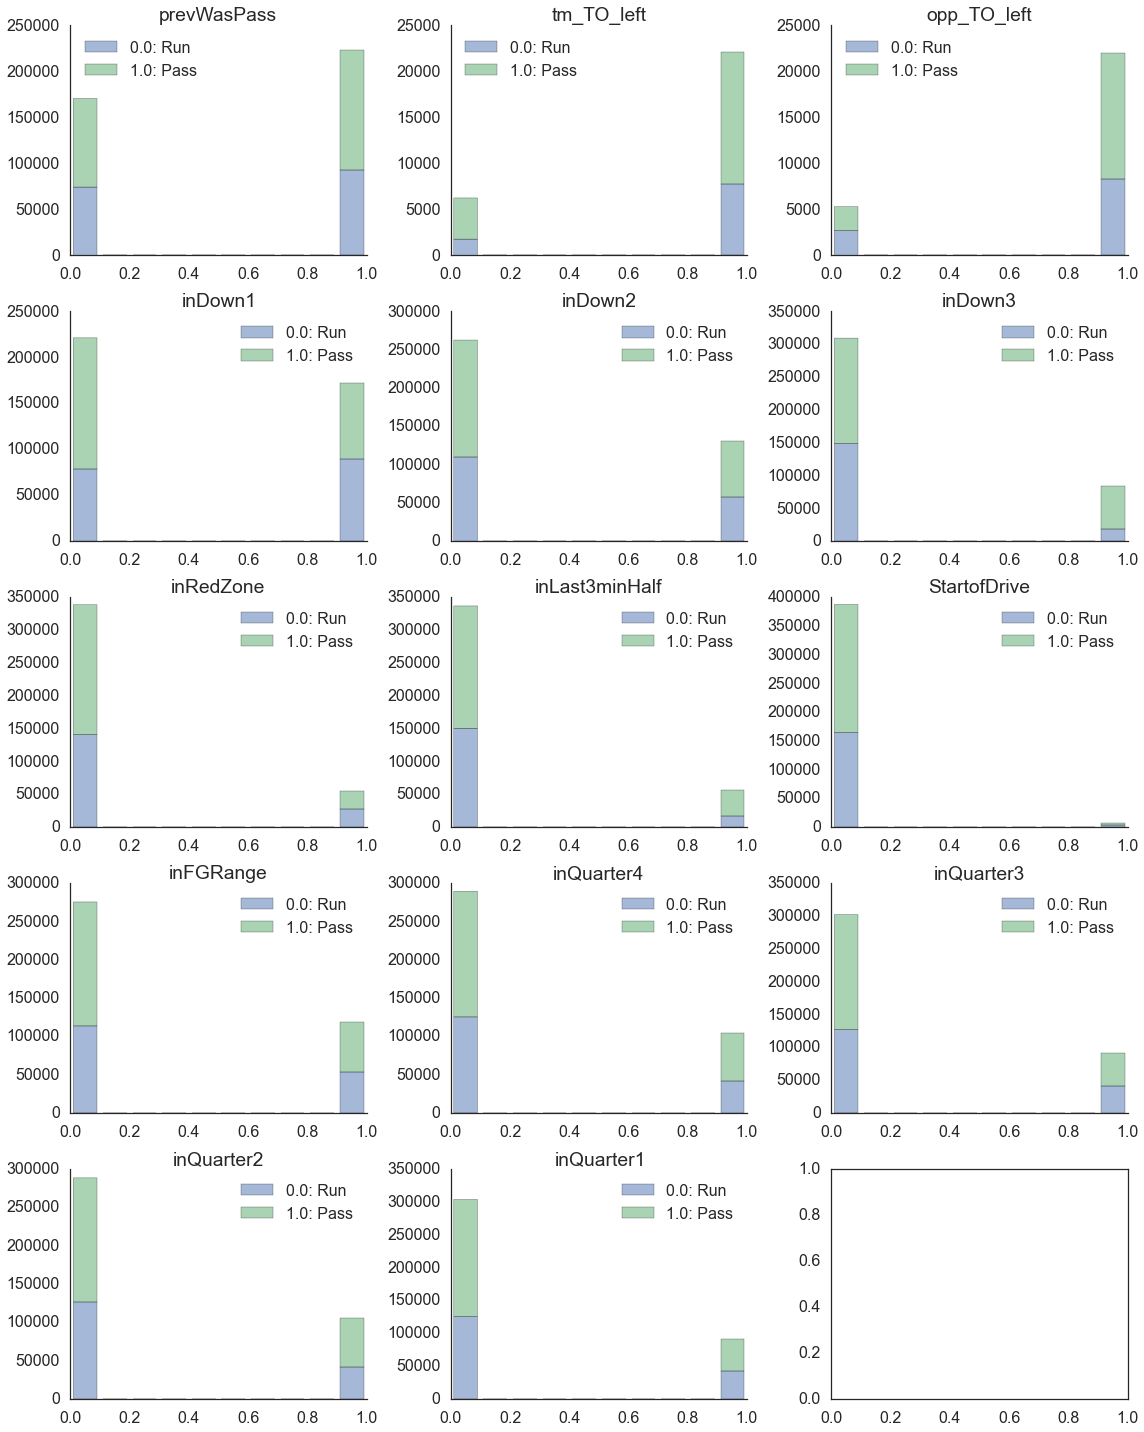

In [50]:
#Display plots of EDA on indicator variables
fig, axes = plt.subplots(nrows=5, ncols=3,figsize=(16,20), tight_layout=True)

for ax, i in zip(axes.ravel(), lcols_i):
    ax.hist([[df[df["RESP"]==0][i]],[df[df["RESP"]==1][i]]], range=(0,1), alpha=0.5, stacked=True)
    ax.legend(["0.0: Run", "1.0: Pass"], loc="best")
    ax.grid(False)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_title(i)

**Interpretation of indicator features EDA:**


In these plots of indicator features, we are searching for variables whose distribution is isolated to either positive (1.0: Pass) or negative (0.0: Run) values. Thus, it's clear that indicators such as `inLast3minHalf`, `inDown3` and `tm_TO_left` distinguish between run and pass plays well. For example, the `inDown3` variable is strongly dominated by pass plays when it is active or has a positive value. This suggests that teams typically pass on third down. 

### **General passing and rushing in game trends:**

In [15]:
#Function for pass clean
def clean_pass(data11):
    data2 = data11[["isPass", "qtr_time_remain", "quarter", "secsElapsedInGame"]]
    data2 = data2[data2.quarter != 5.0]
    data2 = data2.dropna()
    data2 = data2[data2["isPass"] == True]
    return data2

#Plotting function for passes in game
def plot_pass(data):
    ax = plt.subplot(111)
    ax.hist(data["secsElapsedInGame"].values, bins=20, color="lightskyblue")
    ax.set_title("Pass Progression")
    ax.set_xlabel("Time elapsed (seconds)")
    ax.set_ylabel("Frequency")
    ax.set_xlim(0,3600)
    ax.axvline(15*60, color="b", label = "quarter end", ls = '--')
    ax.axvline(30*60, color="b", ls = '--')
    ax.axvline(45*60, color="b", ls = '--')
    ax.legend()
    ax.grid(False)
    sns.despine()
    return ax

#clean function for run
def clean_run(data11):
    data2 = data11[["isRun", "qtr_time_remain", "quarter", "secsElapsedInGame"]]
    data2 = data2[data2.quarter != 5.0]
    data2 = data2.dropna()
    data2 = data2[data2["isRun"] == True]
    return data2

#plot function for runs in game
def plot_run(data):
    ax = plt.subplot(111)
    ax.hist(data["secsElapsedInGame"].values, bins=20, color="lightgreen", alpha=0.8)
    ax.set_title("Run Progression")
    ax.set_xlabel("Time elapsed (seconds)")
    ax.set_ylabel("Frequency")
    ax.set_xlim(0,3600)
    ax.axvline(15*60, color="k", label = "quarter end", ls = '--')
    ax.axvline(30*60, color="k", ls = '--')
    ax.axvline(45*60, color="k", ls = '--')
    ax.legend()
    ax.grid(False)
    sns.despine()
    return ax

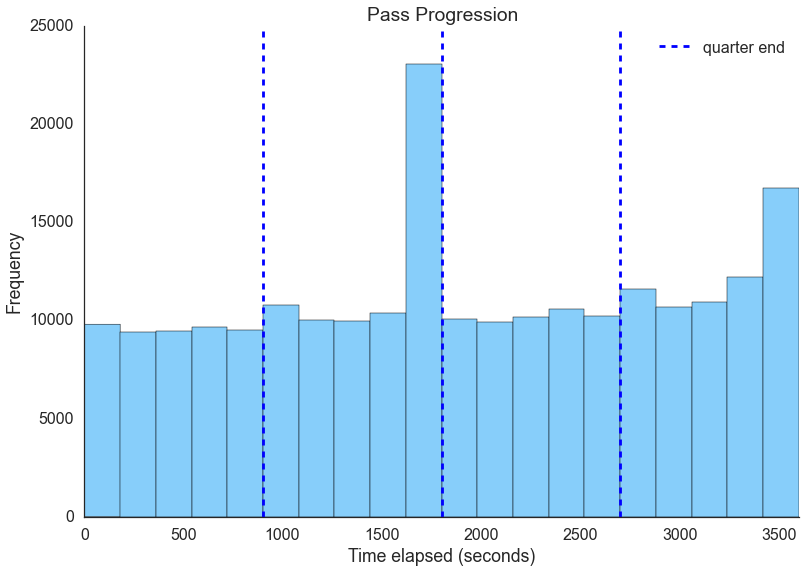

In [51]:
dfgp = clean_pass(df)
plot_pass(dfgp)

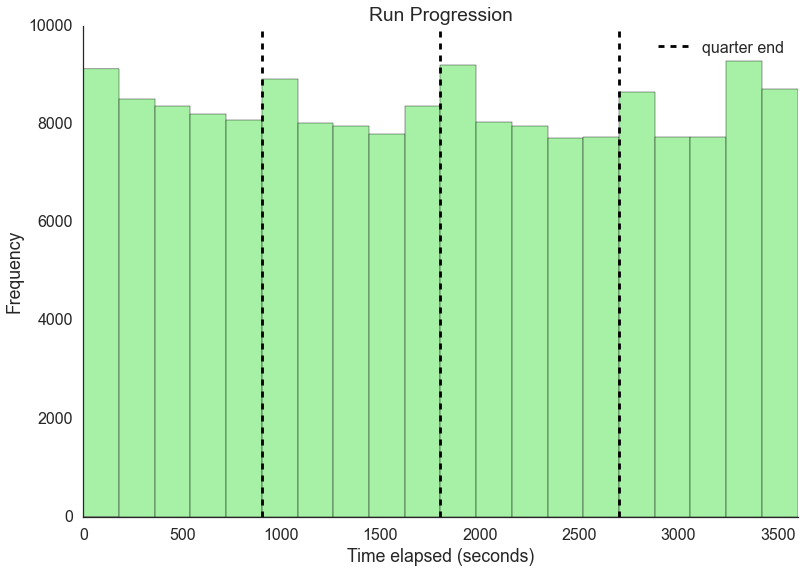

In [53]:
dfgr = clean_run(df)
plot_run(dfgr)

It's interesting that throughout the pass progression that there are large spikes right before halftime and the game's end, which likely signifies a team trying to score with a limited amount of time. On the contrary, the run progression is for the most part uniform with slight spikes in activity at the beginning of the half (teams are probably trying to find their rhythm and gain a first down conservatively) and at the conclusion of the game when winning teams are likely running out the clock. 

### Explore passing plays by yards and down:

In [56]:
# code for creating variables for necessary plots
titlesr = []
titlesy = []
titlesp = []
xs = []
rs = []
ys = []
ps = []
for d,df1 in df.groupby('down'):
    titlesr.append('Running Plays by Yards to First Down on Down ' + str(d))
    titlesy.append('Passing Plays by Yards to First Down on Down ' + str(d))
    titlesp.append('Passing % by Yards to First Down on Down ' + str(d))
    yds = sorted(df1.yds_to_go.unique())
    xs.append(yds)
    rs.append([int(df1[df1.yds_to_go==y]['isRun'].sum()) for y in yds])
    ys.append([int(df1[df1.yds_to_go==y]['RESP'].sum()) for y in yds])
    ps.append([df1[df1.yds_to_go==y]['RESP'].mean()*100.0 for y in yds])

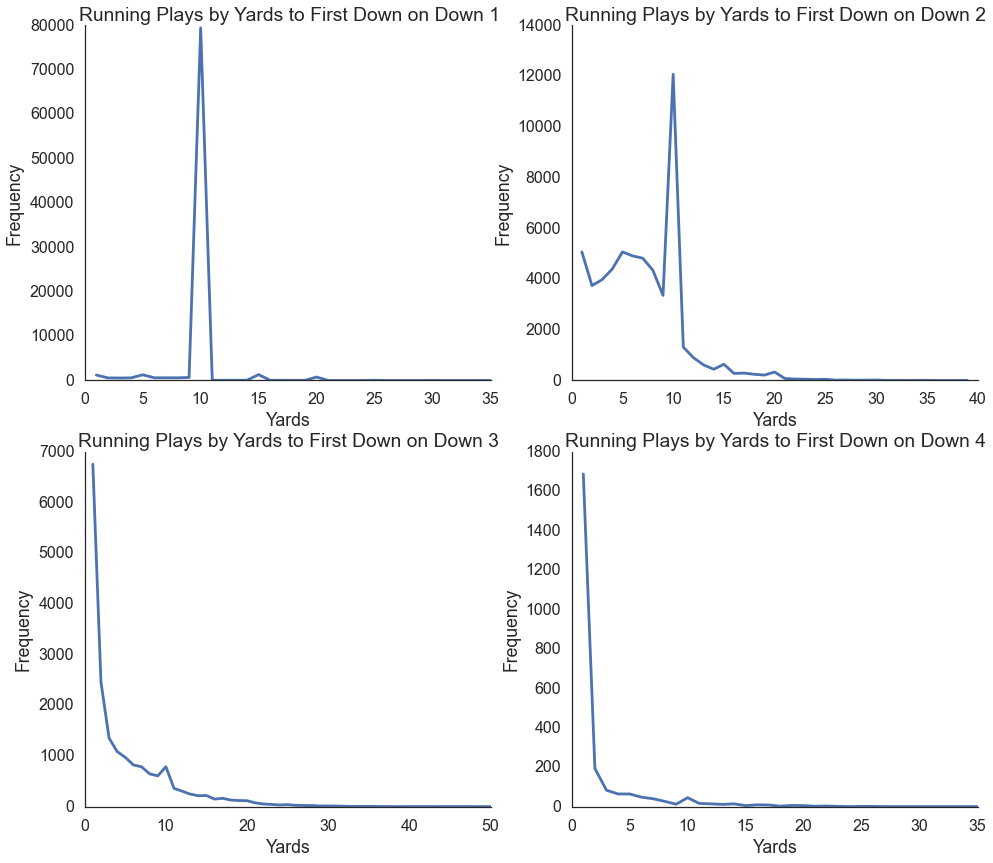

In [60]:
# create subplots for bar charts of number of running plays on each down, by yards to go to first down
f, axarr = plt.subplots(2, 2, figsize=(16,14))
axes = axarr[0].tolist()
axes.extend(axarr[1].tolist())

for i in xrange(4):
    axes[i].plot(xs[i], rs[i])
    axes[i].set_title(titlesr[i])
    axes[i].set_ylabel("Frequency")
    axes[i].set_xlabel("Yards")
    axes[i].grid(False)
    sns.despine()

The spike in the first graph is explained by the simple fact that all new set of downs begin 10 yards away from the first down. Thus, the tiny bumps alongside this spike represent plays in which the first down was repeated due to a holding call, false start or other penalty. The remaining graphs display an interesting relationship between passing plays and yards. They seem to almost demonstrate an effect "giving up" since teams opt to run the ball (more conservative and less of a reward play) when they are further than 10 yards from the first. This effect is magnified for later downs.  

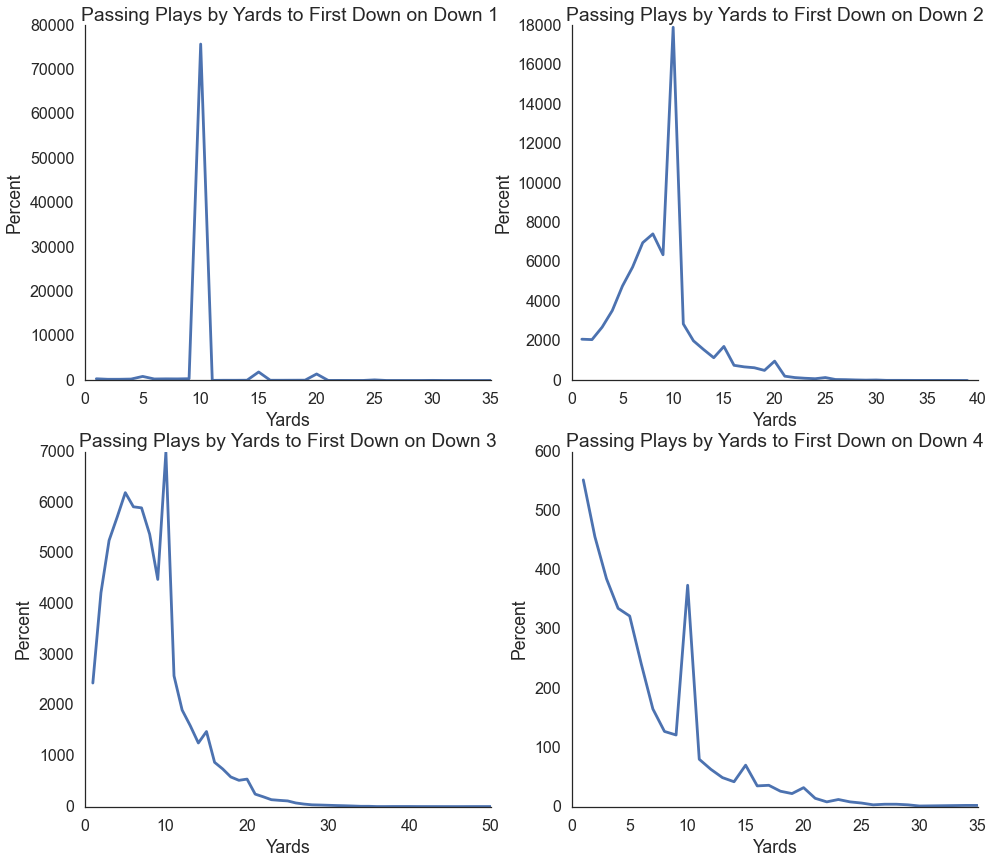

In [61]:
# create subplots for bar charts of number of passing plays on each down, by yards to go to first down
f, axarr = plt.subplots(2, 2, figsize=(16,14))
axes = axarr[0].tolist()
axes.extend(axarr[1].tolist())

for i in xrange(4):
    axes[i].plot(xs[i], ys[i])
    axes[i].set_title(titlesy[i])
    axes[i].set_ylabel("Percent")
    axes[i].set_xlabel("Yards")
    axes[i].grid(False)
    sns.despine()

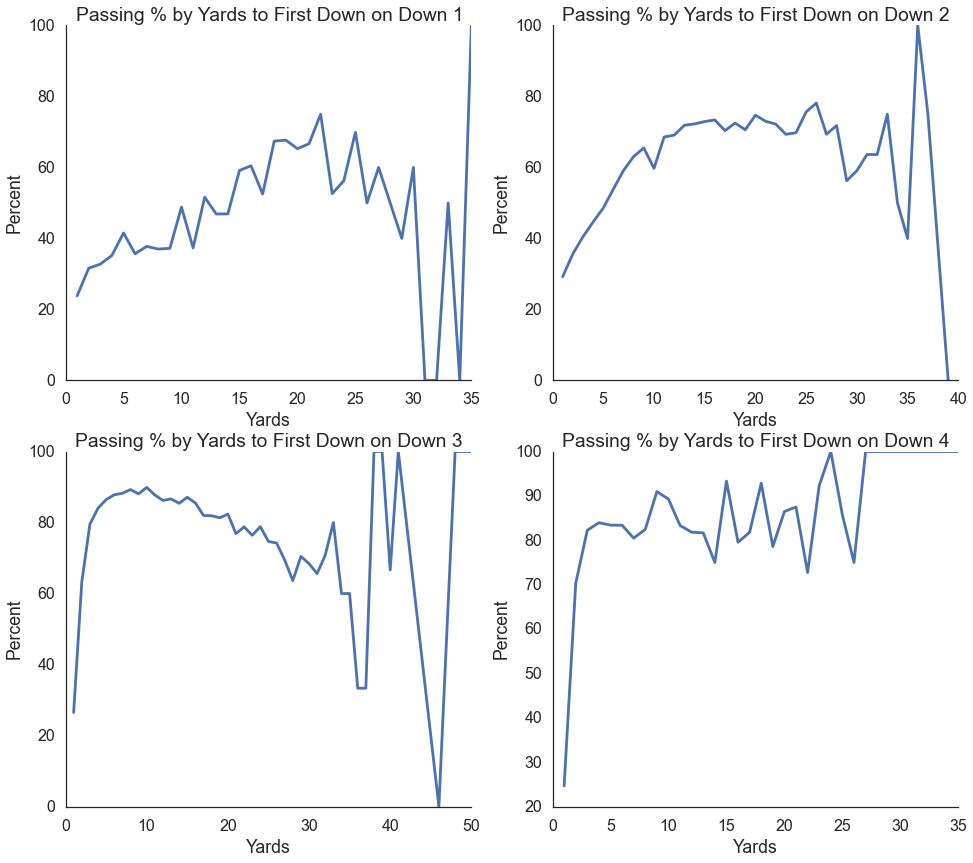

In [62]:
# create subplots for bar charts of % of plays that were passes on each down, by yards to go to first down
f, axarr = plt.subplots(2, 2, figsize=(16,14))
axes = axarr[0].tolist()
axes.extend(axarr[1].tolist())

for i in xrange(4):
    axes[i].plot(xs[i], ps[i])
    axes[i].set_title(titlesp[i])
    axes[i].set_ylabel("Percent")
    axes[i].set_xlabel("Yards")
    axes[i].grid(False)
    sns.despine()

[Proceed Back to Index Notebook Please]()